In [2]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import matplotlib.image as mpimg
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
# Connect to Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Specify the game directory on Google Drive and change the current directory to it
game_dir = '/content/gdrive/MyDrive/'
os.chdir(game_dir)

In [5]:
# Change the current directory to the folder where the game images for "rock" are located and list the files in the directory
%cd '/content/gdrive/MyDrive/game/rock/'
!ls


/content/gdrive/MyDrive/game/rock
00nKV8oHuTGi20gq.png  cWKDIx5D1KB0zqjF.png  JXD8WyY4cQoEyvtU.png  r87DASz5okmR0fnI.png
01dM3ewPIsnBICu1.png  cx9zu6O87PURa2ve.png  JxhewAxaOg3wB1gA.png  rBGSBjzYhvdPSDV0.png
02vG75hQW9Vp4oTl.png  cy37is7PNfZQJ6SU.png  k24NaH1jhXog9y7y.png  Rc1dJyDnXnSjnpoH.png
0bioBZYFCXqJIulm.png  cY3jY96VetFq6Ayp.png  k3AidZ3WX8t14gcJ.png  ReFXAsLF8NkgNAL4.png
0NDYNEoDui7o64gU.png  CZMVXF6ReNFTmQu3.png  k6r5z3dMsqo2H6hk.png  rGh56uZVxk2MZLWF.png
0OEXfEooCXlljaEl.png  d5fTHW3xnYsDhax5.png  KC8RPAtZSyUL0vaR.png  rgLz5OE0s6JRcfiu.png
0P6uxM8Vr1DwySHe.png  D7Ykcj1tYAannu8h.png  kcZfTQqKr8VaSjhk.png  rHHsm5b1CvmcWT57.png
19H63c0MWD56EWNq.png  d9UIt2WF1O9DYHPA.png  kdSoBBdU2T0eoWR2.png  rit0UhP5HizIFoJA.png
1BqjHe5igJAgUjiN.png  dA1kwqyPaGEErN3j.png  kfz2fRvWcTqPzQxn.png  RJSM8dpspJB6ckmX.png
1COBZEE1ALiJIivQ.png  DBvjNfYD7dv2f3gw.png  Khsb4fYDiZjyXfBP.png  RkKc61MLjm4clTPg.png
1DxbXT3M2qiMjCmC.png  dD2TpDGv5gsYUJAl.png  KKYleXVUgi0h0np4.png  rLOijBMEYIaQOL2x.png
1e1VCnCEA

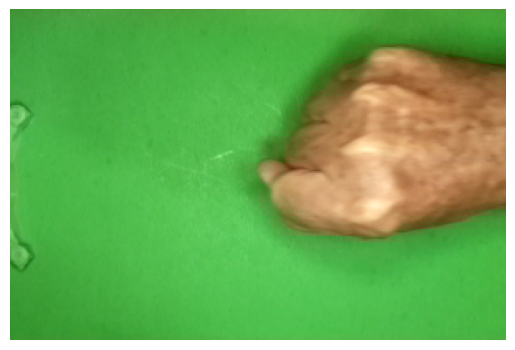

In [6]:

# Specify the path to one of the images
image_path = '/content/gdrive/MyDrive/game/rock/CkjdMgxvvA6Ll8Ca.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [7]:

# Specify the path of the image
image_path = '/content/gdrive/MyDrive/game/rock/CkjdMgxvvA6Ll8Ca.png'

# Read the image using OpenCV
image_cv2 = cv2.imread(image_path)

# Convert the image to RGB (if it's in BGR format)
image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

# Convert to NumPy array
image_np = np.array(image_rgb)



In [8]:
#image_flat = image_cv2.reshape(-1)
#image_flat.shape

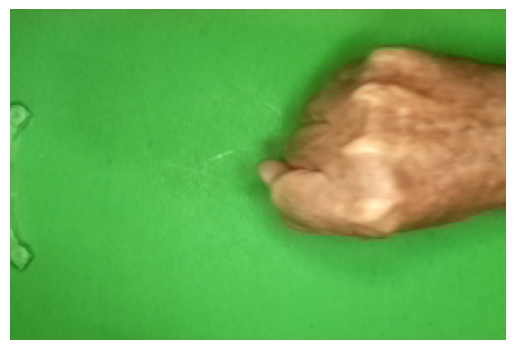

In [9]:
# Load and display the image
plt.imshow(image_np)
plt.axis('off')   # Turn off axis labels
plt.show()

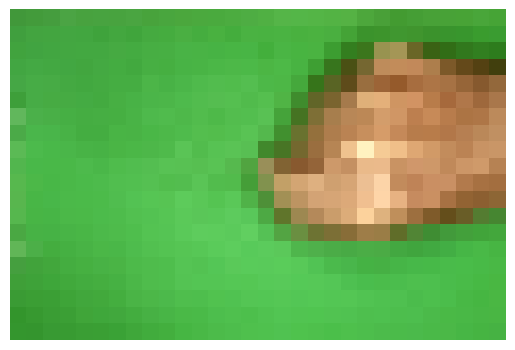

In [10]:
# Resize the image to 30x20 pixels from 300x20x3
resized_image = cv2.resize(image_np, (30, 20))

# Display the resized image
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis labels
plt.show()

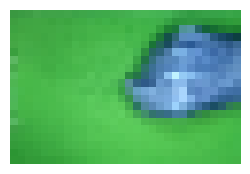

In [11]:
# Resize the image to 30x20 pixels
resized_image = cv2.resize(image_np, (30, 20))

# Convert the resized image to RGB format from BGR format
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Set the figure size for displaying the image (3x2 inches)
plt.figure(figsize=(3, 2))  # Set the figure size to 3x2 inches (adjust as needed)

# Display the resized image using Matplotlib
plt.imshow(resized_image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

First way to convert images without the use of a function.








In [12]:
# Specify the path to the folder containing images
folder_path = '/content/gdrive/MyDrive/game/rock/'

# Get a list of all image file names in the folder
image_files = [f for f in os.listdir(folder_path)] #if f.endswith('.png')]

# Initialize an empty array to store the images
x_rock = np.zeros((len(image_files), 200, 300, 3), dtype=np.uint8)

# Loop through the images and populate the array
for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)

    # Read the image using OpenCV
    image_cv2 = cv2.imread(image_path)

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

    # Store the image in the array
    x_rock[i] = np.array(image_rgb)

# Verify the shape of the resulting array
print(x_rock.shape)

(726, 200, 300, 3)


In [13]:
# Initialize an empty list to store labels for rock images
y_rock = []

# Loop through the images in the dataset
for i in range(len(x_rock[:, 1, 1, 1])):
    y_rock.append(0)  # Append the label 0 for each image

# Check and print the number of labels created
len(y_rock)


726

In [14]:
# Load images of scissors from the specified folder and store them in a NumPy array
folder_path = '/content/gdrive/MyDrive/game/scissors/'

image_files = [f for f in os.listdir(folder_path)] #if f.endswith('.png')]
x_scissors = np.zeros((len(image_files), 200, 300, 3), dtype=np.uint8)

for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    image_cv2 = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    x_scissors[i] = np.array(image_rgb)

print(x_scissors.shape)

(750, 200, 300, 3)


In [15]:
# Initialize an empty list to store labels for the scissor images
y_scissors = []

# Loop through the images in the dataset
for i in range (len(x_scissors[:,1,1,1])):
    y_scissors.append(1)

# Check and print the number of labels created
len(y_scissors)


750

In [16]:
# Load images of paper from the specified folder and store them in a NumPy array
folder_path = '/content/gdrive/MyDrive/game/paper/'

image_files = [f for f in os.listdir(folder_path)] #if f.endswith('.png')]
x_paper = np.zeros((len(image_files), 200, 300, 3), dtype=np.uint8)

for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    image_cv2 = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    x_paper[i] = np.array(image_rgb)

print(x_paper.shape)

(712, 200, 300, 3)


In [17]:
# Initialize an empty list to store labels for the paper images
y_paper = []

# Loop through the images in the dataset
for i in range (len(x_paper[:,1,1,1])):
    y_paper.append(2)

# Check and print the number of labels created
len(y_paper)

712

Second way to convert images with the use of a function."

In [18]:
# Load images from the specified folder_path and assign them to the given class_name
def images  (folder_path, class_name):

  # Get a list of image files in the folder
  image_files = [f for f in os.listdir(folder_path)] #if f.endswith('.png')]

  # Create an empty NumPy array to store the images
  x = np.zeros((len(image_files), 200, 300, 3), dtype=np.uint8)

  # Loop through the image files and load each one
  for i, image_file in enumerate(image_files):
      image_path = os.path.join(folder_path, image_file)
      image_cv2 = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
      x[i] = np.array(image_rgb)

  # Create a list of class labels for the loaded images
  y  = []
  for i in range (len(x[:,1,1,1])):
      y.append(class_name)

  y = np.array(y)
  return x, y

In [19]:
# Load images from the specified folder_path and assign them to the given class_name
def images_new  (folder_path, class_name):

  # Get a list of image files in the folder
  image_files = [f for f in os.listdir(folder_path)] #if f.endswith('.png')]

  # Create an empty NumPy array to store the images
  x = np.zeros((len(image_files), 300, 200, 3), dtype=np.uint8)

  # Loop through the image files and load each one
  for i, image_file in enumerate(image_files):
      image_path = os.path.join(folder_path, image_file)
      image_cv2 = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

      #Resize the image to 200x300 pixels
      x[i] = cv2.resize(image_rgb, (200, 300))


  # Create a list of class labels for the loaded images
  y  = []
  for i in range (len(x[:,1,1,1])):
      y.append(class_name)

  y = np.array(y)
  return x, y

In [20]:
# Load images and assign class labels for the "rock" category
x_rock, y_rock = images('/content/gdrive/MyDrive/game/rock/', 0)

# Get the shape (dimensions) of the loaded images
x_rock.shape, y_rock.shape

((726, 200, 300, 3), (726,))

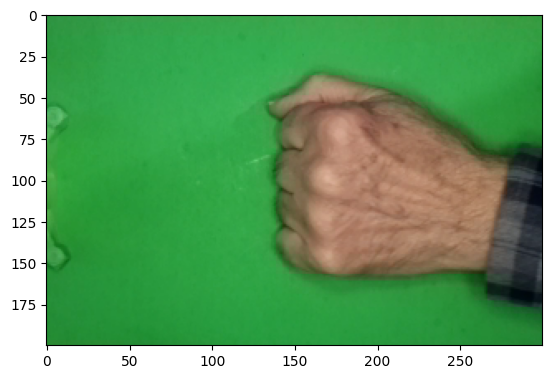

In [21]:
# Display the first image
plt.imshow(x_rock[1,:,:,:])
plt.show()

In [22]:
# Load images and assign class labels for the "scissors" category
x_scissors, y_scissors = images('/content/gdrive/MyDrive/game/scissors/', 1)

# Get the shape (dimensions) of the loaded images
x_scissors.shape, y_scissors.shape

((750, 200, 300, 3), (750,))

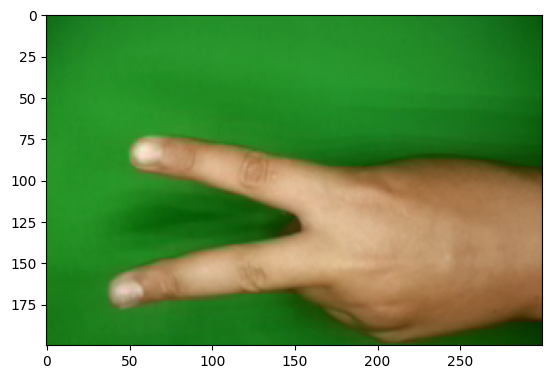

In [23]:
# Display the first image
plt.imshow(x_scissors[1,:,:,:])
plt.show()

In [24]:
# Load images and assign class labels for the "paper" category
x_paper, y_paper = images('/content/gdrive/MyDrive/game/paper/', 2)

# Get the shape (dimensions) of the loaded images
x_paper.shape, y_paper.shape

((712, 200, 300, 3), (712,))

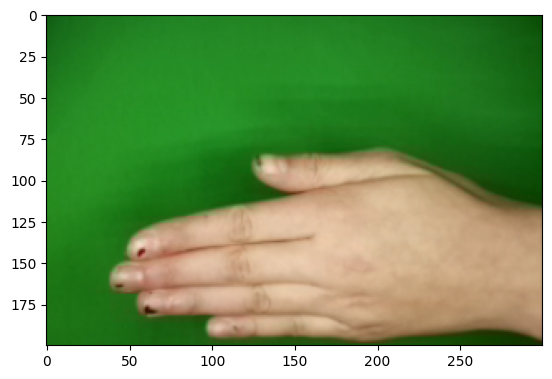

In [25]:
# Display the first image
plt.imshow(x_paper[1,:,:,:])
plt.show()

In [26]:
# Concatenate the image data for all three categories: "rock," "scissors," and "paper"
x_total = np.concatenate([x_rock, x_scissors, x_paper])

# Concatenate the corresponding labels for all three categories
y_total = np.concatenate([y_rock, y_scissors, y_paper])

# Get and display the shape (dimensions) of the combined dataset and labels
x_total.shape, y_total.shape

((2188, 200, 300, 3), (2188,))

In [27]:
# Load the image data for the "rock" category from the images taken by myself using a new function (images_new)
x_rock_new, y_rock_new = images_new('/content/gdrive/MyDrive/RockPaperScissors/rock/', 0)

# Get and display the shape (dimensions) of the new "rock" dataset and labels
x_rock_new.shape, y_rock_new.shape

((26, 300, 200, 3), (26,))

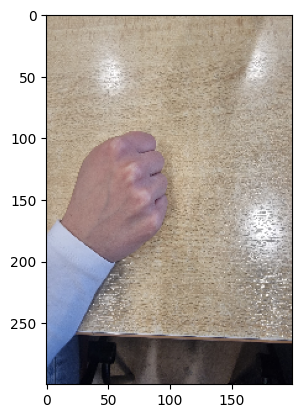

In [28]:
# Display the first image
plt.imshow(x_rock_new[1,:,:,:])
plt.show()

In [29]:
# Load the image data for the "paper" category from the images taken by myself using a new function (images_new)
x_paper_new, y_paper_new = images_new('/content/gdrive/MyDrive/RockPaperScissors/paper/', 2)

# Get and display the shape (dimensions) of the new "paper" dataset and labels
x_paper_new.shape, y_paper_new.shape

((18, 300, 200, 3), (18,))

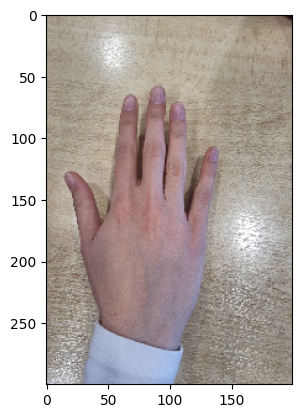

In [30]:
# Display the first image
plt.imshow(x_paper_new[1,:,:,:])
plt.show()

In [31]:
# Load the image data for the "scissors" category from the images taken by myself using a new function (images_new)
x_scissors_new, y_scissors_new = images_new('/content/gdrive/MyDrive/RockPaperScissors/scissors/', 1)

# Get and display the shape (dimensions) of the new "scissors" dataset and labels
x_scissors_new.shape, y_scissors_new.shape

((20, 300, 200, 3), (20,))

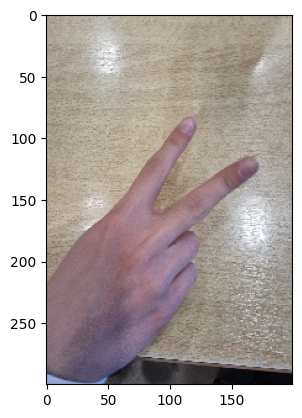

In [32]:
# Display the first image
plt.imshow(x_scissors_new[1,:,:,:])
plt.show()

In [33]:
# Concatenate the image data for all three categories: "rock," "scissors," and "paper"
x_total_new = np.concatenate([x_rock_new, x_scissors_new, x_paper_new])

# Concatenate the corresponding labels for all three categories
y_total_new = np.concatenate([y_rock_new, y_scissors_new, y_paper_new])

# Get and display the shape (dimensions) of the combined dataset and labels
x_total_new.shape, y_total_new.shape

((64, 300, 200, 3), (64,))

In [34]:
# Define a mapping between numerical labels (0, 1, 2) and their corresponding Greek names (Πέτρα, Ψαλίδι, Χαρτί)
moves_mapping = {0: 'Πέτρα', 1: 'Ψαλίδι', 2: 'Χαρτί'}

In [35]:
def random_agent(x, y, moves_mapping ):

    # Randomly select a move for the Random Agent (0: Rock, 1: Scissors, 2: Paper)
    agent_move = np.random.choice([0, 1, 2])

    # Find indices where y matches the agent's move
    indices = np.where(y == agent_move)[0]  # Use [0] to access the indices as a 1D array

    # Choose a random index from the matching indices
    image_idex = np.random.choice(indices)

    # Get the corresponding image and move mapping
    agent_image = x[image_idex,:,:,:]
    agent_move_mapping = moves_mapping[agent_move]

    # Image processing
    p1 = 0.5  # Probability of Vertical Flip
    p2 = 0.5  # Probability of Horizontal Flip

    if np.random.rand() < p1:
        agent_image = agent_image[:, ::-1, :]  # Vertical flip

    if np.random.rand() < p2:
        agent_image = agent_image[::-1, :, :]  # Horizontal flip

    # Add noise to the image
    noise = np.random.normal(loc=0, scale=0.05 * np.max(agent_image), size=agent_image.shape)
    agent_image = agent_image.astype(float)
    agent_image += noise

    # Normalize values to the range [0, 255]
    agent_image = np.clip(agent_image, 0, 255).astype(np.uint8)

    # Convert the image to grayscale
    agent_image = cv2.cvtColor(agent_image, cv2.COLOR_RGB2GRAY)

    # Reshape the image to a 1D array
    agent_image = agent_image.reshape(1, -1)

    return agent_image, agent_move, agent_move_mapping

In [36]:
# Call the random_agent function to obtain a random agent move and image from the given images
agent_image, agent_move,agent_move_mapping = random_agent(x_total, y_total, moves_mapping)


In [37]:
# Call the random_agent function to obtain a random agent move and image from my images (new)
agent_image_new, agent_move_new,agent_move_mapping_new = random_agent(x_total_new, y_total_new, moves_mapping)


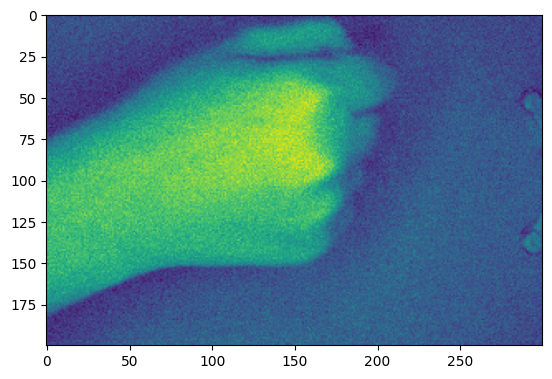

In [38]:
# Display the image
plt.imshow(agent_image.reshape(200,300))
plt.show()

In [39]:
# Splitting given dataset into training and testing sets, preserving class distribution.
sample_size1 = 100
sample_size2 = 50
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, train_size=sample_size1, test_size = sample_size2, stratify= y_total, random_state=42)
x_train.shape , y_train.shape , x_test.shape , y_test.shape


((100, 200, 300, 3), (100,), (50, 200, 300, 3), (50,))

In [40]:
# Splitting my dataset into training and testing sets, preserving class distribution.
sample_size3 = 40
sample_size4 = 14
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_total_new, y_total_new, train_size=sample_size3, test_size = sample_size4, stratify= y_total_new, random_state=42)
x_train_new.shape , y_train_new.shape , x_test_new.shape , y_test_new.shape

((40, 300, 200, 3), (40,), (14, 300, 200, 3), (14,))

In [41]:
# Convert given dataset to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Initialize an empty list to store the grayscale images
x_train_gray = []
x_test_gray = []

# Iterate through each image in the dataset and convert to grayscale
for img1 in x_train:
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    x_train_gray.append(gray_img1)
for img2 in x_test:
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    x_test_gray.append(gray_img2)

# Convert the list of grayscale images back to a numpy array
x_train_gray = np.array(x_train_gray)
x_test_gray = np.array(x_test_gray)
x_train_gray.shape, x_test_gray.shape, x_test.shape

((100, 200, 300), (50, 200, 300), (50, 200, 300, 3))

In [42]:
# Convert my dataset to numpy arrays
x_train_new = np.array(x_train_new)
x_test_new = np.array(x_test_new)

# Initialize an empty list to store the grayscale images
x_train_gray_new = []
x_test_gray_new = []

# Iterate through each image in the dataset and convert to grayscale
for img1_new in x_train_new:
    gray_img1_new = cv2.cvtColor(img1_new, cv2.COLOR_RGB2GRAY)
    x_train_gray_new.append(gray_img1_new)
for img2_new in x_test_new:
    gray_img2_new = cv2.cvtColor(img2_new, cv2.COLOR_RGB2GRAY)
    x_test_gray_new.append(gray_img2_new)

# Convert the list of grayscale images back to a numpy array
x_train_gray_new = np.array(x_train_gray_new)
x_test_gray_new = np.array(x_test_gray_new)
x_train_gray_new.shape, x_test_gray_new.shape, x_test_new.shape

((40, 300, 200), (14, 300, 200), (14, 300, 200, 3))

In [43]:
# Flatten given training and testing images and check their shapes.
x_train_flat = x_train.reshape(sample_size1,-1)
x_test_flat = x_test.reshape(sample_size2, -1)
x_train_flat.shape, x_test_flat.shape

((100, 180000), (50, 180000))

In [44]:
# Flatten given training and testing grayscale images and check their shapes.
x_train_gray_flat = x_train_gray.reshape(sample_size1,-1)
x_test_gray_flat =  x_test_gray.reshape(sample_size2,-1)
x_train_gray_flat.shape, x_test_gray_flat.shape

((100, 60000), (50, 60000))

In [45]:
# Flatten my training and testing images and check their shapes.
x_train_flat_new = x_train_new.reshape(sample_size3,-1)
x_test_flat_new = x_test_new.reshape(sample_size4, -1)
x_train_flat_new.shape, x_test_flat_new.shape

((40, 180000), (14, 180000))

In [46]:
# Flatten my training and testing grayscale images and check their shapes.
x_train_gray_flat_new = x_train_gray_new.reshape(sample_size3,-1)
x_test_gray_flat_new =  x_test_gray_new.reshape(sample_size4,-1)
x_train_gray_flat_new.shape, x_test_gray_flat_new.shape

((40, 60000), (14, 60000))

In [124]:
# Perform an extensive hyperparameter search for the SVM model, record and sort results by accuracy.
c_values = [0.1, 1, 10, 100]
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
gamma_values = ['scale', 'auto']
results = []

for c in c_values:
    for kernel in kernel_values:
        for gamma in gamma_values:

            start_time = time.time()

            svc_model = SVC(kernel=kernel, C=c, gamma=gamma, random_state=42)
            svc_model.fit(x_train_gray_flat, y_train)

            y_pred_svm = svc_model.predict(x_test_gray_flat)

            end_time = time.time()

            accuracy = accuracy_score(y_test, y_pred_svm)

            training_time = end_time - start_time

            cv_scores = cross_val_score(svc_model, x_train_gray_flat, y_train, cv=5, scoring='accuracy')
            mean_accuracy = cv_scores.mean()


            results.append({
                'c_value': c,
                'kernel_value': kernel,
                'gamma_value': gamma,
                'accuracy': accuracy,
                'mean_accuracy(Cross-Validation)': mean_accuracy,
                'training_time': training_time
            })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)
results_df_sorted.reset_index(drop=True, inplace=True)
results_df_sorted

,c_value,kernel_value,gamma_value,accuracy,mean_accuracy(Cross-Validation),training_time
0,100.0,poly,auto,0.78,0.65,1.156596
1,100.0,poly,scale,0.78,0.65,0.700653
2,0.1,poly,scale,0.78,0.65,0.769794
3,0.1,poly,auto,0.78,0.65,0.645056
4,10.0,poly,auto,0.78,0.65,1.688686
5,10.0,poly,scale,0.78,0.65,0.714848
6,1.0,poly,scale,0.78,0.65,0.685628
7,1.0,poly,auto,0.78,0.65,0.667042
8,100.0,rbf,scale,0.74,0.80,1.087085
9,1.0,rbf,scale,0.74,0.74,2.136039


In [125]:
# Perform an extensive hyperparameter search for the SVM model (with new data), record and sort results by accuracy.
c_values = [0.1, 1, 10, 100]
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
gamma_values = ['scale', 'auto']
results_new = []

for c in c_values:
    for kernel in kernel_values:
        for gamma in gamma_values:

            start_time = time.time()

            svc_model_new = SVC(kernel=kernel, C=c, gamma=gamma, random_state=42)
            svc_model_new.fit(x_train_gray_flat_new, y_train_new)

            y_pred_svm_new = svc_model_new.predict(x_test_gray_flat_new)

            end_time = time.time()

            accuracy_new = accuracy_score(y_test_new, y_pred_svm_new)

            training_time = end_time - start_time

            cv_scores_new = cross_val_score(svc_model_new, x_train_gray_flat_new, y_train_new, cv=5, scoring='accuracy')
            mean_accuracy_new = cv_scores_new.mean()


            results_new.append({
                'c_value': c,
                'kernel_value': kernel,
                'gamma_value': gamma,
                'accuracy': accuracy_new,
                'mean_accuracy(Cross-Validation)': mean_accuracy_new,
                'training_time': training_time
            })

results_df_new = pd.DataFrame(results_new)
results_df_sorted_new = results_df_new.sort_values(by='accuracy', ascending=False)
results_df_sorted_new.reset_index(drop=True, inplace=True)
results_df_sorted_new

,c_value,kernel_value,gamma_value,accuracy,mean_accuracy(Cross-Validation),training_time
0,0.1,linear,scale,1.000000,0.925,0.102485
1,1.0,linear,auto,1.000000,0.925,0.204545
2,100.0,rbf,scale,1.000000,0.875,0.131385
3,100.0,linear,auto,1.000000,0.925,0.080617
4,100.0,linear,scale,1.000000,0.925,0.093077
5,10.0,rbf,scale,1.000000,0.875,0.129549
6,10.0,linear,auto,1.000000,0.925,0.112132
7,0.1,linear,auto,1.000000,0.925,0.094257
8,10.0,linear,scale,1.000000,0.925,0.094950
9,1.0,linear,scale,1.000000,0.925,0.101255


In [126]:
# Perform an extensive hyperparameter search for the Random Forest Classifier, record, and sort results by accuracy.
n_estimators = [50, 100, 200]
criterion = ['gini', 'entropy','log_loss']
min_samples_split = [2, 5, 10]
results1 = []

for n in n_estimators:
    for c in criterion:
        for s in min_samples_split:

            start_time = time.time()

            model_rf = RandomForestClassifier(n_estimators=n, criterion=c, min_samples_split=s, random_state=0)

            model_rf = model_rf.fit(x_train_gray_flat, y_train)

            y_pred_rf = model_rf.predict(x_test_gray_flat)

            end_time = time.time()

            accuracy_rf = accuracy_score(y_test, y_pred_rf)

            training_time = end_time - start_time

            cv_scores_rf = cross_val_score(model_rf, x_train_gray_flat, y_train, cv=5, scoring='accuracy')
            mean_accuracy_rf = cv_scores_rf.mean()

            results1.append({
                'n_estimators': n,
                'criterion': c,
                'min_samples_split': s,
                'accuracy_rf': accuracy_rf,
                'mean_accuracy(Cross-Validation)_rf': mean_accuracy_rf,
                'training_time': training_time
            })

results_df1 = pd.DataFrame(results1)
results_df1_sorted = results_df1.sort_values(by='accuracy_rf', ascending=False)
results_df1_sorted.reset_index(drop=True, inplace=True)
results_df1_sorted

,n_estimators,criterion,min_samples_split,accuracy_rf,mean_accuracy(Cross-Validation)_rf,training_time
0,200,log_loss,10,0.76,0.77,2.034578
1,200,entropy,10,0.76,0.77,1.818011
2,100,log_loss,10,0.76,0.77,0.882826
3,100,entropy,10,0.76,0.77,1.319628
4,100,entropy,2,0.74,0.77,0.937115
5,200,log_loss,5,0.74,0.78,1.838941
6,200,entropy,5,0.74,0.78,2.819909
7,200,gini,10,0.74,0.78,1.369900
8,200,gini,5,0.74,0.77,1.702708
9,100,log_loss,5,0.74,0.77,0.925414


In [127]:
# Perform an extensive hyperparameter search for the Random Forest Classifier (with new data), record, and sort results by accuracy.
n_estimators = [50, 100, 200]
criterion = ['gini', 'entropy','log_loss']
min_samples_split = [2, 5, 10]
results1_new = []

for n in n_estimators:
    for c in criterion:
        for s in min_samples_split:

            start_time = time.time()

            model_rf_new = RandomForestClassifier(n_estimators=n, criterion=c, min_samples_split=s, random_state=0)

            model_rf_new = model_rf_new.fit(x_train_gray_flat_new, y_train_new)

            y_pred_rf_new = model_rf_new.predict(x_test_gray_flat_new)

            end_time = time.time()

            accuracy_rf_new = accuracy_score(y_test_new, y_pred_rf_new)

            training_time = end_time - start_time

            cv_scores_rf_new = cross_val_score(model_rf_new, x_train_gray_flat_new, y_train_new, cv=5, scoring='accuracy')
            mean_accuracy_rf_new = cv_scores_rf_new.mean()

            results1_new.append({
                'n_estimators': n,
                'criterion': c,
                'min_samples_split': s,
                'accuracy_rf': accuracy_rf_new,
                'mean_accuracy(Cross-Validation)_rf': mean_accuracy_rf_new,
                'training_time': training_time
            })

results_df1_new = pd.DataFrame(results1_new)
results_df1_sorted_new = results_df1_new.sort_values(by='accuracy_rf', ascending=False)
results_df1_sorted_new.reset_index(drop=True, inplace=True)
results_df1_sorted_new

,n_estimators,criterion,min_samples_split,accuracy_rf,mean_accuracy(Cross-Validation)_rf,training_time
0,100,entropy,5,1.000000,0.750,0.551858
1,100,entropy,10,1.000000,0.775,0.325095
2,200,log_loss,5,1.000000,0.775,0.696963
3,200,log_loss,2,1.000000,0.775,0.701711
4,200,entropy,10,1.000000,0.750,0.666121
5,200,entropy,5,1.000000,0.775,0.703480
6,200,entropy,2,1.000000,0.775,0.684968
7,200,gini,10,1.000000,0.775,0.555480
8,200,gini,5,1.000000,0.825,0.837237
9,200,gini,2,1.000000,0.825,0.568447


In [129]:
# Perform an extensive hyperparameter search for the K-Nearest Neighbors Classifier,record, and sort results by accuracy.
n_values = [5, 15, 25, 50]
weights_values = ['uniform', 'distance']
p_values = [1, 2]
results2 = []

for n_neighbors in n_values:
    for weights in weights_values:
        for p_value in p_values:

            start_time = time.time()

            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p_value)
            knn.fit(x_train_gray_flat, y_train)
            y_pred_knn = knn.predict(x_test_gray_flat)

            end_time = time.time()

            accuracy_knn = accuracy_score(y_test, y_pred_knn)

            training_time = end_time - start_time

            cv_scores_knn = cross_val_score(knn, x_train_gray_flat, y_train, cv=5, scoring='accuracy')
            mean_accuracy_knn = cv_scores_knn.mean()

            results2.append({
                'n_neighbors': n_neighbors,
                'weights': weights,
                'p': p_value,
                'accuracy': accuracy_knn,
                'mean_accuracy(Cross-Validation)_knn': mean_accuracy_knn,
                'training_time': training_time
            })

results_df2 = pd.DataFrame(results2)
results_df2_sorted = results_df2.sort_values(by='accuracy', ascending=False)
results_df2_sorted.reset_index(drop=True, inplace=True)
results_df2_sorted

,n_neighbors,weights,p,accuracy,mean_accuracy(Cross-Validation)_knn,training_time
0,5,distance,2,0.76,0.73,0.063515
1,5,distance,1,0.74,0.77,0.358337
2,5,uniform,2,0.70,0.69,0.075165
3,5,uniform,1,0.68,0.74,0.328486
4,15,distance,1,0.68,0.67,0.348261
5,15,uniform,1,0.66,0.64,0.347013
6,25,distance,1,0.66,0.63,0.405738
7,15,distance,2,0.62,0.66,0.096585
8,25,uniform,1,0.62,0.56,0.508089
9,15,uniform,2,0.60,0.58,0.072689


In [128]:
# Perform an extensive hyperparameter search for the K-Nearest Neighbors Classifier (with new data),record, and sort results by accuracy.
n_values = [5, 15, 25, 30]
weights_values = ['uniform', 'distance']
p_values = [1, 2]
results2_new = []

for n_neighbors in n_values:
    for weights in weights_values:
        for p_value in p_values:

            start_time = time.time()

            knn_new = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p_value)
            knn_new.fit(x_train_gray_flat_new, y_train_new)
            y_pred_knn_new = knn_new.predict(x_test_gray_flat_new)

            end_time = time.time()

            accuracy_knn_new = accuracy_score(y_test_new, y_pred_knn_new)

            training_time = end_time - start_time

            cv_scores_knn_new = cross_val_score(knn_new, x_train_gray_flat_new, y_train_new, cv=5, scoring='accuracy')
            mean_accuracy_knn_new = cv_scores_knn_new.mean()

            results2_new.append({
                'n_neighbors': n_neighbors,
                'weights': weights,
                'p': p_value,
                'accuracy': accuracy_knn_new,
                'mean_accuracy(Cross-Validation)_knn': mean_accuracy_knn_new,
                'training_time': training_time
            })

results_df2_new = pd.DataFrame(results2_new)
results_df2_sorted_new = results_df2_new.sort_values(by='accuracy', ascending=False)
results_df2_sorted_new.reset_index(drop=True, inplace=True)
results_df2_sorted_new

,n_neighbors,weights,p,accuracy,mean_accuracy(Cross-Validation)_knn,training_time
0,5,uniform,2,0.928571,0.700,0.018769
1,5,distance,2,0.928571,0.725,0.018598
2,5,uniform,1,0.785714,0.775,0.041399
3,5,distance,1,0.785714,0.825,0.054202
4,15,uniform,2,0.785714,0.725,0.018606
5,15,distance,2,0.785714,0.700,0.016054
6,25,uniform,2,0.714286,0.300,0.018732
7,25,distance,2,0.714286,0.425,0.016113
8,30,distance,2,0.714286,0.475,0.015693
9,30,distance,1,0.642857,0.475,0.050344


In [53]:
# Function to determine the outcome of a round in a Rock-Paper-Scissors game.
def play_time (my_move, agent_move_mapping, moves_mapping):

    # Define the moves of the game
    wins = [("Πέτρα", "Ψαλίδι"), ("Ψαλίδι", "Χαρτί"), ("Χαρτί", "Πέτρα")]

    my_move_mapping = moves_mapping[my_move]

    # Check the outcome of the round
    if my_move_mapping == agent_move_mapping:
        return 0  # Draw
    elif (my_move_mapping, agent_move_mapping) in wins:
        return 1  #Win
    else:
        return -1  # Lose

In [130]:
# Play a specified number of rounds of Rock-Paper-Scissors game between different agents using given dataset (SVM, KNN, RF) with the given data.
# Use of the best parameters from the classification algorithms
num_rounds = 10
total_score_svm = []
total_score_knn = []
total_score_rf = []

# Initialize total_score_rf with zeros for each round
for _ in range(num_rounds):
    total_score_rf.append(0)
    total_score_svm.append(0)
    total_score_knn.append(0)

# Play multiple rounds of the game
for round in range(num_rounds):

    # Generate a random agent move and image
    agent_image, agent_move, agent_move_mapping = random_agent(x_total, y_total, moves_mapping)

    # Predict the agent's move using SVM
    svc_model = SVC(kernel=results_df_sorted['kernel_value'][0], C=results_df_sorted['c_value'][0], gamma=results_df_sorted['gamma_value'][0], random_state=42)
    svc_model.fit(x_train_gray_flat, y_train)
    y_pred_svm_image = svc_model.predict(agent_image)
    y_pred_svm_best = svc_model.predict(x_test_gray_flat)

    # Predict the agent's move using KNN
    knn = KNeighborsClassifier(n_neighbors=results_df2_sorted['n_neighbors'][0], weights=results_df2_sorted['weights'][0], p=results_df2_sorted['p'][0])
    knn.fit(x_train_gray_flat, y_train)
    y_pred_knn_image = knn.predict(agent_image)
    y_pred_knn_best = knn.predict(x_test_gray_flat)


    # Predict the agent's move using RF
    model_rf = RandomForestClassifier(n_estimators=results_df1_sorted['n_estimators'][0], criterion=results_df1_sorted['criterion'][0], min_samples_split=results_df1_sorted['min_samples_split'][0], random_state=0)
    model_rf = model_rf.fit(x_train_gray_flat, y_train)
    y_pred_rf_image = model_rf.predict(agent_image)
    y_pred_rf_best = model_rf.predict(x_test_gray_flat)


    # Determine the move of each agent based on predictions
    if int(y_pred_svm_image) == 0:
        my_move_svm = 2
    elif int(y_pred_svm_image) == 1:
        my_move_svm = 0
    else:
        my_move_svm = 1

    if int(y_pred_knn_image) == 0:
        my_move_knn = 2
    elif int(y_pred_knn_image) == 1:
        my_move_knn = 0
    else:
        my_move_knn = 1

    if int(y_pred_rf_image) == 0:
        my_move_rf = 2
    elif int(y_pred_rf_image) == 1:
        my_move_rf = 0
    else:
        my_move_rf = 1

    # Determine the result of each round for SVM
    result_svm = play_time(my_move_svm, agent_move_mapping, moves_mapping)
    if (round==0):
        total_score_svm[round] = result_svm
    else :
       total_score_svm[round] = total_score_svm[round-1] + result_svm

    # Determine the result of each round for KNN
    result_knn = play_time(my_move_knn, agent_move_mapping, moves_mapping)
    if (round==0):
        total_score_knn[round] = result_knn
    else :
       total_score_knn[round] = total_score_knn[round-1] + result_knn

    # Determine the result of each round for RF
    result_rf = play_time(my_move_rf, agent_move_mapping, moves_mapping)

    if (round==0):
        total_score_rf[round] = result_rf
    else :
       total_score_rf[round] = total_score_rf[round-1] + result_rf

In [96]:
total_score_svm, total_score_knn, total_score_rf

([1, 2, 1, 2, 3, 3, 4, 5, 6, 5],
 [-1, 0, -1, 0, 0, 0, 0, 1, 2, 1],
 [0, 1, 0, 1, 2, 2, 1, 2, 3, 2])

In [97]:
# Array with the number of trials of the game.
trials = np.arange(0, num_rounds)
trials

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
 # Generating a plot of the score for each round.
def line_plot(trials, total_score, a):
    plt.figure(figsize=(12, 6))
    plt.plot(trials, total_score, label=a)
    plt.title('Score per trial ' + a)
    plt.xlabel('Trials')
    plt.ylabel('Score')
    plt.xticks(trials)
    plt.yticks(total_score)
    plt.legend()
    plt.show()

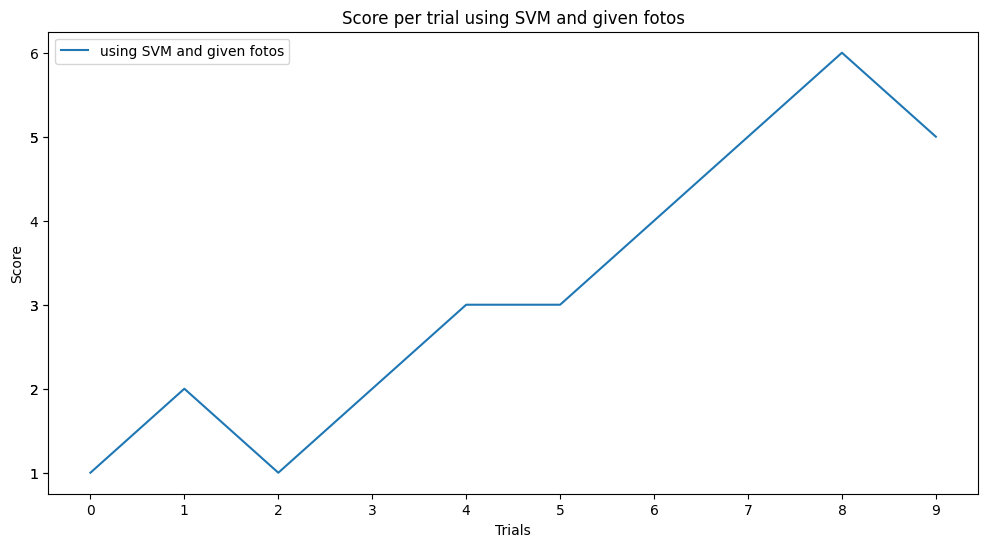

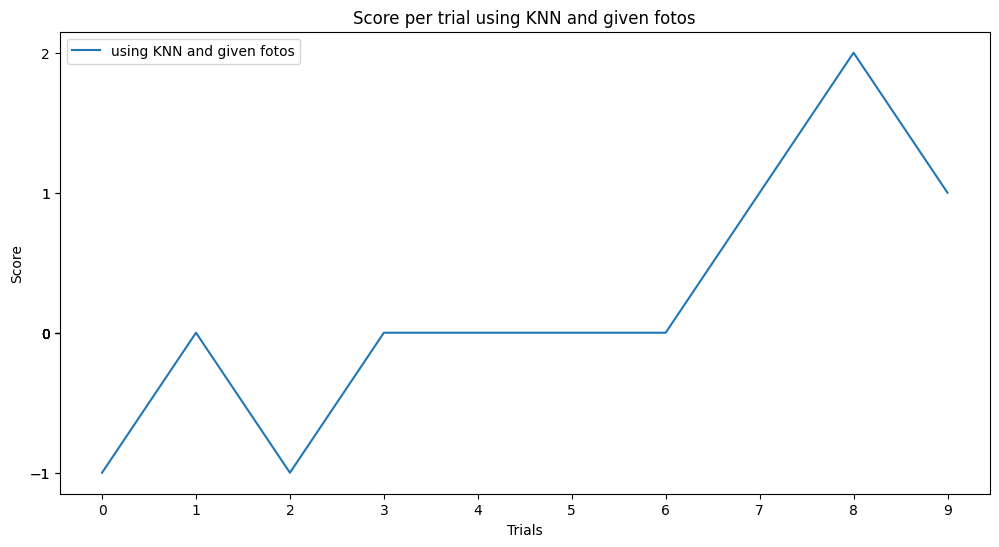

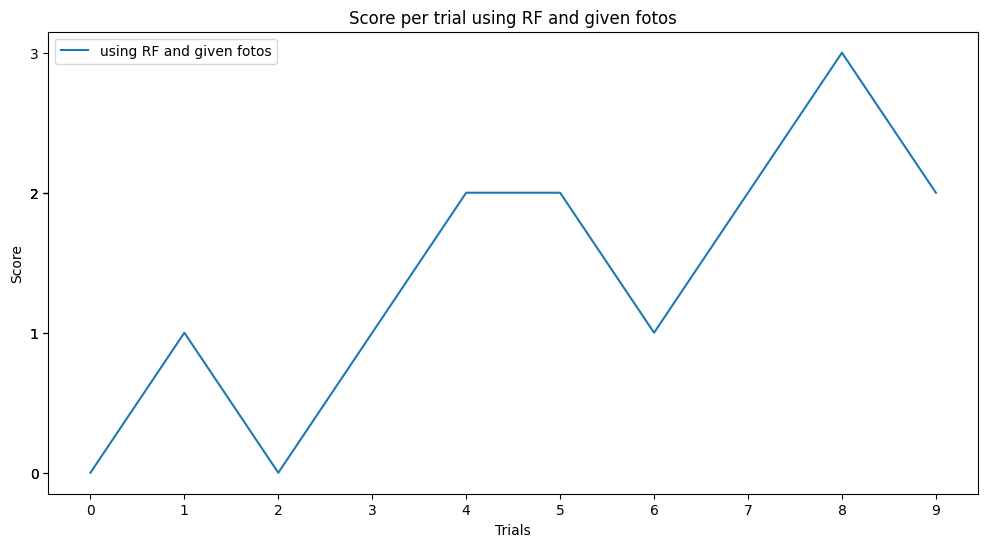

In [99]:
#Plotting Scores for different agents for the given dataset (using different algorithms for classification).
line_plot (trials,total_score_svm,'using SVM and given fotos')
line_plot (trials,total_score_knn,'using KNN and given fotos')
line_plot (trials,total_score_rf,'using RF and given fotos')

In [100]:

# Function that generates and displays a confusion matrix for evaluating classification models.
def conf_matr (y_test, y_pred, a):

    # Compute the confusion matrix.
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

    # Create a display object for the confusion matrix visualization.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(cmap='Blues')  # Blue colormap
    plt.title('Confusion Matrix '+ a)
    plt.show()

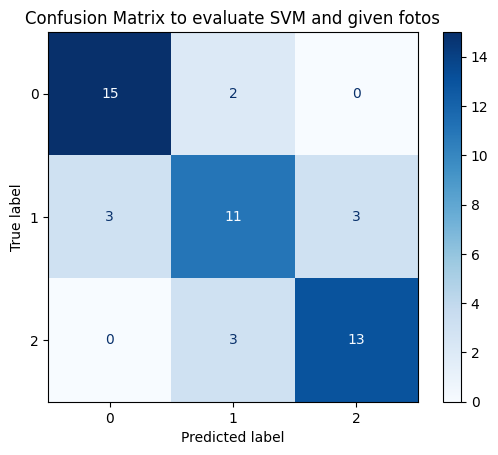

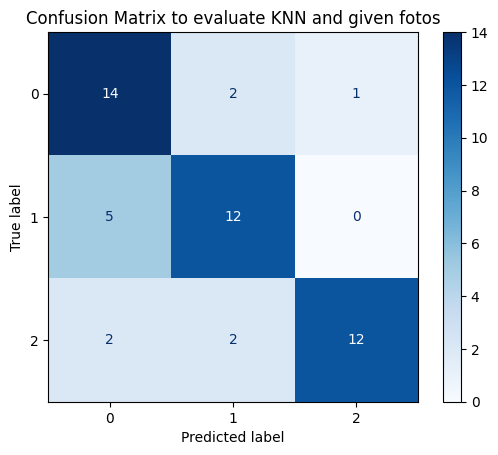

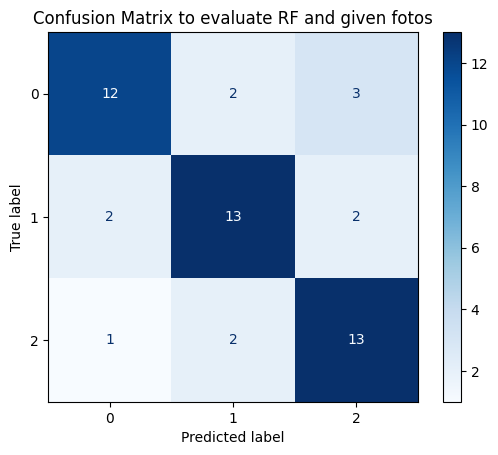

In [137]:
#Dislay confusion matrix for different agents for the given dataset (using different algorithms for classification).
conf_matr (y_test, y_pred_svm_best, 'to evaluate SVM and given fotos')
conf_matr (y_test, y_pred_knn_best, 'to evaluate KNN and given fotos')
conf_matr (y_test, y_pred_rf_best, 'to evaluate RF and given fotos')

In [102]:
# Function that generates and prints a classification report for evaluating classification models.
def class_rep (y_test, y_pred, a):

    # Define class labels for the report
    class_labels = ['rock', 'paper', 'scissors']

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names= class_labels)
    print('Classification Report ' + a +':\n', report)

In [136]:
#Dislay the classification report for different agents for the given dataset (using different algorithms for classification).
class_rep (y_test, y_pred_svm_best, 'to evaluate SVM and given fotos')
class_rep (y_test, y_pred_knn_best, 'to evaluate KNN and given fotos')
class_rep (y_test, y_pred_rf_best, 'to evaluate RF and given fotos')

Classification Report to evaluate SVM and given fotos:
               precision    recall  f1-score   support

        rock       0.83      0.88      0.86        17
       paper       0.69      0.65      0.67        17
    scissors       0.81      0.81      0.81        16

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50

Classification Report to evaluate KNN and given fotos:
               precision    recall  f1-score   support

        rock       0.67      0.82      0.74        17
       paper       0.75      0.71      0.73        17
    scissors       0.92      0.75      0.83        16

    accuracy                           0.76        50
   macro avg       0.78      0.76      0.76        50
weighted avg       0.78      0.76      0.76        50

Classification Report to evaluate RF and given fotos:
               precision    recall  f1-score   support

        rock    

In [134]:
# Play a specified number of rounds of Rock-Paper-Scissors game between different agents using my dataset (SVM, KNN, RF) with the new data.
# Use of the best parameters from the classification algorithms
num_rounds = 10
total_score_svm_new = []
total_score_knn_new = []
total_score_rf_new = []

# Initialize total_score_rf with zeros for each round
for _ in range(num_rounds):
    total_score_rf_new.append(0)
    total_score_svm_new.append(0)
    total_score_knn_new.append(0)

# Play multiple rounds of the game
for round in range(num_rounds):

    # Generate a random agent move and image
    agent_image_new, agent_move_new, agent_move_mapping_new = random_agent(x_total_new, y_total_new, moves_mapping)

    # Predict the agent's move using SVM
    svc_model_new = SVC(kernel=results_df_sorted_new['kernel_value'][0], C=results_df_sorted_new['c_value'][0], gamma=results_df_sorted_new['gamma_value'][0], random_state=42)
    svc_model_new.fit(x_train_gray_flat_new, y_train_new)
    y_pred_svm_image_new = svc_model_new.predict(agent_image_new)
    y_pred_svm_best_new = svc_model_new.predict(x_test_gray_flat_new)


    # Predict the agent's move using KNN
    knn_new = KNeighborsClassifier(n_neighbors=results_df2_sorted_new['n_neighbors'][0], weights=results_df2_sorted_new['weights'][0], p=results_df2_sorted_new['p'][0])
    knn_new.fit(x_train_gray_flat_new, y_train_new)
    y_pred_knn_image_new = knn_new.predict(agent_image_new)
    y_pred_knn_best_new = knn_new.predict(x_test_gray_flat_new)


    # Predict the agent's move using RF
    model_rf_new = RandomForestClassifier(n_estimators=results_df1_sorted_new['n_estimators'][0], criterion=results_df1_sorted_new['criterion'][0], min_samples_split=results_df1_sorted_new['min_samples_split'][0], random_state=0)
    model_rf_new = model_rf_new.fit(x_train_gray_flat_new, y_train_new)
    y_pred_rf_image_new = model_rf_new.predict(agent_image_new)
    y_pred_rf_best_new = model_rf_new.predict(x_test_gray_flat_new)


    # Determine the move based on predictions
    if int(y_pred_svm_image_new) == 0:
        my_move_svm_new = 2
    elif int(y_pred_svm_image_new) == 1:
        my_move_svm_new = 0
    else:
        my_move_svm_new = 1

    if int(y_pred_knn_image_new) == 0:
        my_move_knn_new = 2
    elif int(y_pred_knn_image_new) == 1:
        my_move_knn_new = 0
    else:
        my_move_knn_new = 1

    if int(y_pred_rf_image_new) == 0:
        my_move_rf_new = 2
    elif int(y_pred_rf_image_new) == 1:
        my_move_rf_new = 0
    else:
        my_move_rf_new = 1

    # Determine the result of each round for SVM
    result_svm_new = play_time(my_move_svm_new, agent_move_mapping_new, moves_mapping)

    if (round==0):
        total_score_svm_new[round] = result_svm_new
    else :
       total_score_svm_new[round] = total_score_svm_new[round-1] + result_svm_new

    # Determine the result of each round for KNN
    result_knn_new = play_time(my_move_knn_new, agent_move_mapping_new, moves_mapping)
    # Ενημέρωση του συνολικού κέρδους
    if (round==0):
        total_score_knn_new[round] = result_knn_new
    else :
       total_score_knn_new[round] = total_score_knn_new[round-1] + result_knn_new

    # Determine the result of each round for RF
    result_rf_new = play_time(my_move_rf_new, agent_move_mapping_new, moves_mapping)

    if (round==0):
        total_score_rf_new[round] = result_rf_new
    else :
       total_score_rf_new[round] = total_score_rf_new[round-1] + result_rf_new

In [120]:
total_score_svm_new, total_score_knn_new, total_score_rf_new

([1, 0, 1, 0, -1, -1, 0, -1, 0, 0],
 [1, 0, -1, -2, -3, -3, -2, -3, -2, -2],
 [1, 0, 1, 0, -1, -1, 0, 1, 2, 2])

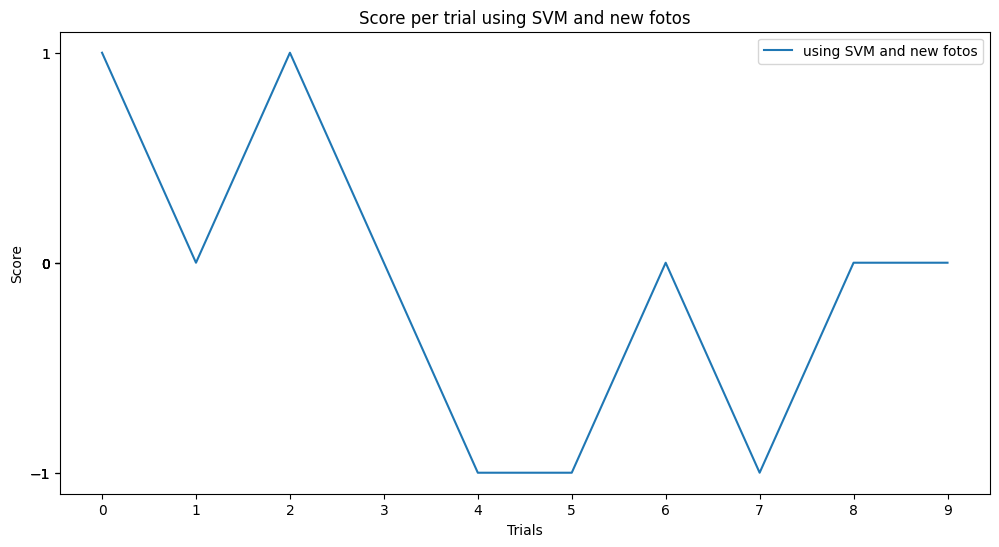

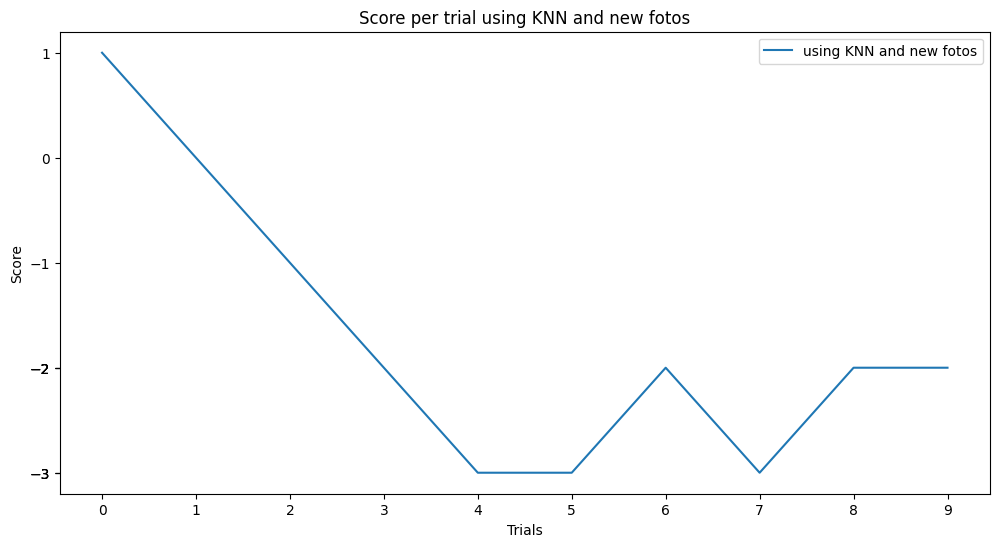

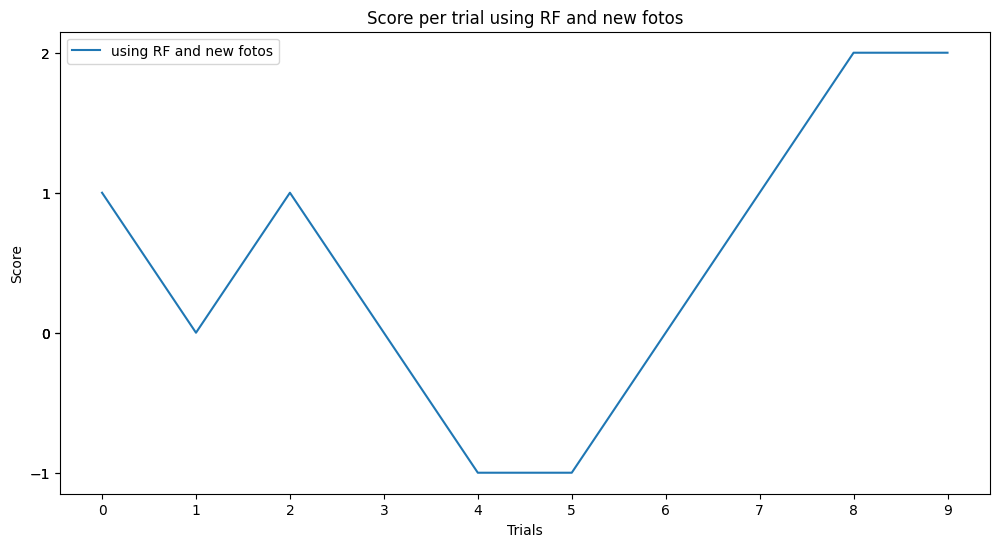

In [121]:
#Plotting Scores for different agents for my dataset (using different algorithms for classification).
line_plot (trials,total_score_svm_new,'using SVM and new fotos')
line_plot (trials,total_score_knn_new,'using KNN and new fotos')
line_plot (trials,total_score_rf_new,'using RF and new fotos')

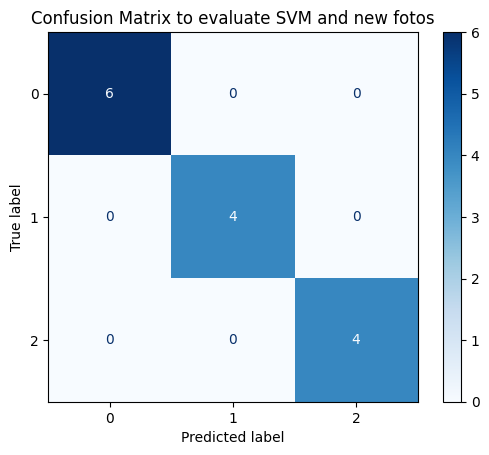

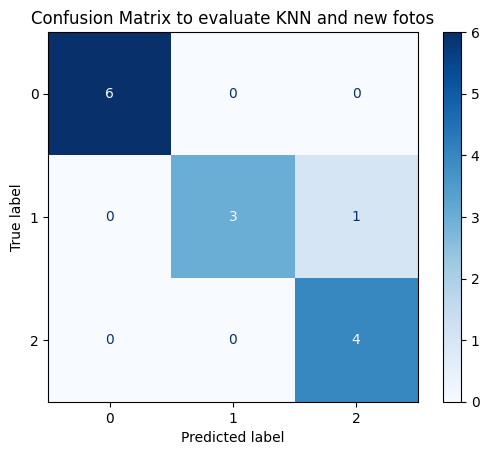

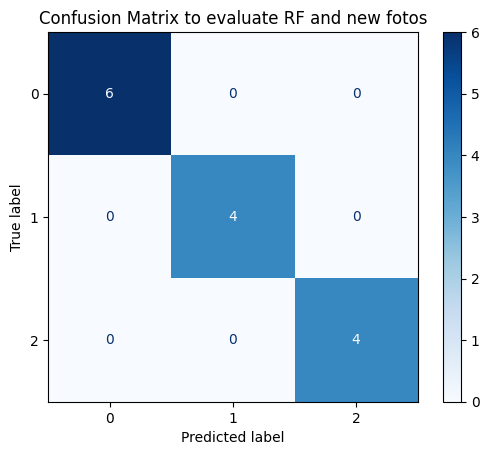

In [135]:
#Dislay confusion matrix for different agents for my dataset (using different algorithms for classification).
conf_matr (y_test_new, y_pred_svm_best_new, 'to evaluate SVM and new fotos')
conf_matr (y_test_new, y_pred_knn_best_new, 'to evaluate KNN and new fotos')
conf_matr (y_test_new, y_pred_rf_best_new, 'to evaluate RF and new fotos')

In [138]:
#Dislay the classification report for different agents for my dataset (using different algorithms for classification).
class_rep (y_test_new, y_pred_svm_best_new,'to evaluate SVM and new fotos')
class_rep (y_test_new, y_pred_knn_best_new,'to evaluate KNN and new fotos')
class_rep (y_test_new, y_pred_rf_best_new,'to evaluate RF and new fotos')

Classification Report to evaluate SVM and new fotos:
               precision    recall  f1-score   support

        rock       1.00      1.00      1.00         6
       paper       1.00      1.00      1.00         4
    scissors       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Classification Report to evaluate KNN and new fotos:
               precision    recall  f1-score   support

        rock       1.00      1.00      1.00         6
       paper       1.00      0.75      0.86         4
    scissors       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.93      0.92      0.92        14
weighted avg       0.94      0.93      0.93        14

Classification Report to evaluate RF and new fotos:
               precision    recall  f1-score   support

        rock       1.0